## Space Missions Data Analysis
This notebook is divided into:

- Data manipulation

- Study about the cost of the missions (fail)

- Study abount the collaboration between companies (fail)

- Launches until first success

In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data type
from datetime import datetime

#for plots
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns


        
        
Space_data = pd.read_csv("./Space_Corrected.csv")
Space_data.head()       

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data manipulation

First I'm going to make a little data treatment.

Location:

I'm going to find the country where the missil is launched from the last part of the column Location. It's not allways true, but we can make an idea of wich countries have their own missiles.

In [7]:
country=[]
for i in range(0,Space_data.shape[0]):
    str=Space_data['Location'].iloc[i]
    str_by_parts=str.split(",")
    country.append(str_by_parts[len(str_by_parts)-1].strip())

Space_data['Country'] = country

Datum:

From Datum create Date and Year, but later I will only take in to account the Year.

In [8]:
date=[]
time=[]
year=[]
for i in range(0,Space_data.shape[0]):
    str=Space_data['Datum'].iloc[i]
    day=str[:3]
    mm=str[4:7]
    dd=str[8:10]
    aaaa=str[12:16]
    hh_mm=str[17:22]
    str = dd+'/'+mm+'/'+aaaa
    date_object = datetime.strptime(str, '%d/%b/%Y')
    date.append(date_object)
    year.append(aaaa)


Space_data['Date'] = date
Space_data['Year'] = year

# Convert to numeric (the column was a string)
Space_data['Year']=pd.to_numeric(Space_data.Year)

Status Rocket:

I just convert it into a numeric value.

In [9]:
status_mapping={'StatusRetired':0,'StatusActive':1}

Space_data['Status Rocket']=Space_data['Status Rocket'].map(status_mapping)

Rocket: cost of the mission in $ million

In [10]:
# There are spaces after the data 
Space_data['Rocket']=Space_data[' Rocket'].str.strip()

# The thousands mark is a comma
Space_data['Rocket'] = Space_data['Rocket'].str.replace(',','')

# There are nans, so I fill with 0. 
Space_data['Rocket'] = Space_data['Rocket'].fillna(0)

# Convert to numeric (the column was a string)
Space_data['Rocket']=pd.to_numeric(Space_data.Rocket)

## Cost of the missions

Having data of the Space Missions since 1958, I thought it was interesting to study the investment done from the Western Bloc and the Eastern Bloc. 
Althought we don't have the column in the dataset that distinguishes one from another, we can find that information on the internet:

https://en.wikipedia.org/wiki/Western_Bloc

https://en.wikipedia.org/wiki/Eastern_Bloc

The problem that I had to study this is that many of the ussr data don't have this information.

Plot a histogram by countries to make an idea of wich contributes more or less.

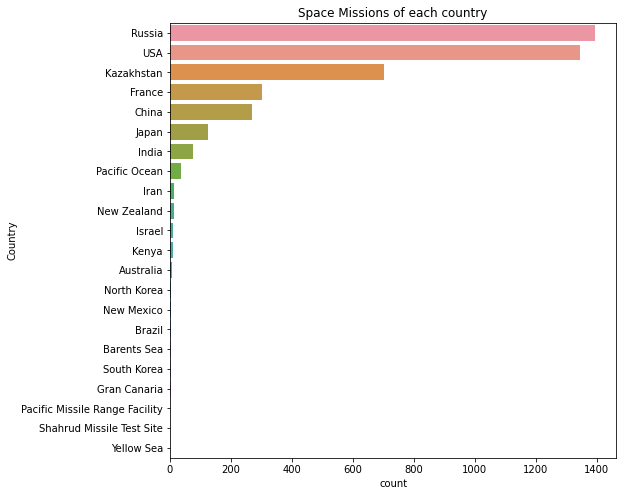

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(8,8))
plt.title("Space Missions of each country")
sns.countplot(y="Country", data=Space_data, order=Space_data["Country"].value_counts().index);


We can see how Russia is the country that more launches has done in history. But in fact, during the Cold War, Russia was a part of the USSR as it was Kazakhstan

https://en.wikipedia.org/wiki/Kazakh_Soviet_Socialist_Republic

So, from the point of view of the economic investment during the Cold War, we should include Kazakhstan. In fact, the Sputnik (the first artificial satellite of the USSR and of the world) was launched from Kazakhstan.

I'm going to plot every company (not country) taking into account if we know the investment or not. 

Text(0.5, 1.0, 'Cost of the missions')

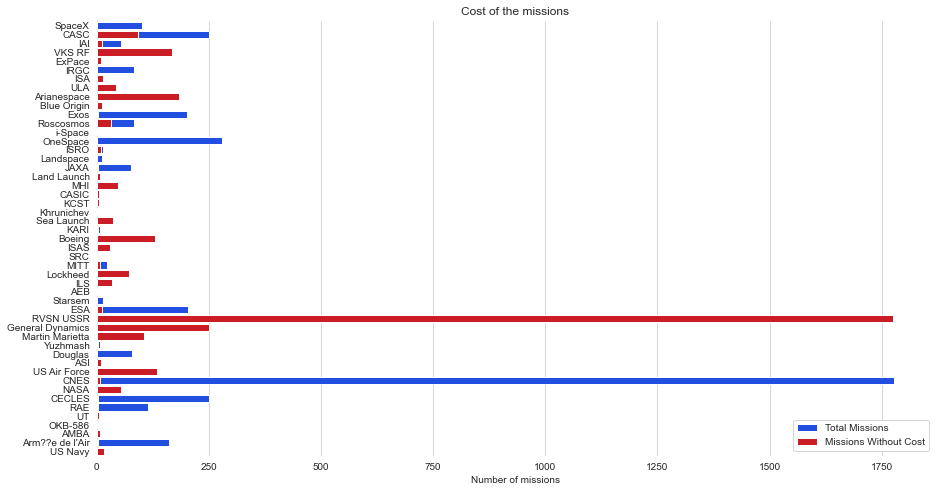

In [12]:
mask_0=Space_data.Rocket==0

import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the matplotlib figure
sns.set_style(style="whitegrid")
f,ax = plt.subplots(figsize=(15,8))

# Plot the total missions
sns.set_color_codes(palette="bright")
sns.countplot(y="Company Name", data=Space_data,
            label="Total Missions", color="b");
# Plot missions where we don't know the cost
sns.countplot(y="Company Name", data=Space_data[mask_0],
            label="Missions Without Cost", color="r");

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Number of missions")
sns.despine(left=True, bottom=True)
plt.title("Cost of the missions")

We can see how in our dataset we don't have all the investment from the USSR company during all the Cold War.

From the dissolution of the USSR, in 1991, Russia has it's own company, Rocosmos. 

https://en.wikipedia.org/wiki/Roscosmos

In this company we have most of the information about their investment, but there are much less information than during all the cold war. 

If we plot again but after the end of the Cold War (aproximately 1991), we still find an important lack of information about the cost of the missions.

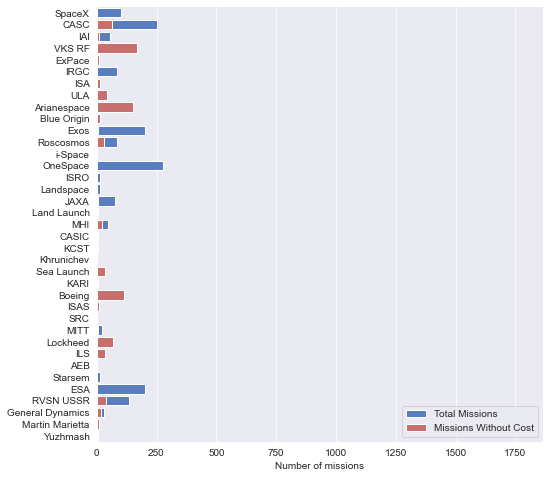

In [13]:
mask_0=Space_data.Rocket==0
mask_1991=Space_data.Year>=1991


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")

# Initialize the matplotlib figure
f,ax = plt.subplots(figsize=(8,8))

# Plot the total missions
sns.set_color_codes(palette="muted")
sns.countplot(y="Company Name", data=Space_data,
            label="Total Missions", color="b");
sns.countplot(y="Company Name", data=Space_data[mask_0&mask_1991],
            label="Missions Without Cost", color="r");


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Number of missions")
sns.despine(left=True, bottom=True)

## Collaboration between companies

To study the collaborations between different companies in the same missions, I'm going to look up for registers of missions with two or more companies. 

To do that, first I capture the number of times that a Detail appears for different Companies. Then I print the registers that appear more than one time.

In [14]:
counts=Space_data.groupby('Detail')['Company Name'].transform('nunique')

ind=[]
for i in range(0,counts.shape[0]):
    if counts[i]>1:
        ind.append(i)

Space_data.loc[ind,['Company Name','Detail','Year']].sort_values('Year').sort_values('Detail')


,Company Name,Detail,Year
1558,Martin Marietta,Titan IV(401)A | Mercury,1994
1448,Lockheed,Titan IV(401)A | Mercury,1996
1576,Martin Marietta,Titan IV(401)A | Trumpet,1994
1500,Lockheed,Titan IV(401)A | Trumpet,1995
1663,Martin Marietta,Titan IV(404)A | KH-11 Kennen,1992
1475,Lockheed,Titan IV(404)A | KH-11 Kennen,1995


This mission Titan is the only one in all the dataset in wich contributes more than one Company. 

But if we look into the internet, that in 1995 Martin Marietta fussions with Lockheed Corporation to create Lockheed Martin, so this missions don't represent no collaboration. 

https://en.wikipedia.org/wiki/Lockheed_Martin

We can find collaborations between agencies, for example

https://www.esa.int/Science_Exploration/Space_Science/Cassini-Huygens/International_collaboration#:~:text=Cassini-Huygens%20is%20an%20international%20collaboration%20between%20three%20space,Laboratory.%20The%20Huygens%20probe%20was%20built%20by%20ESA.

In fact, if I look in the dataste for Cassini, I find one row


In [15]:
maskC=Space_data['Detail'].str.contains('Cassini', regex=False)
Space_data[maskC]

Space_data.loc[1360,:]

Unnamed: 0                                            1360
Unnamed: 0.1                                          1360
Company Name                                      Lockheed
Location          SLC-40, Cape Canaveral AFS, Florida, USA
Datum                           Wed Oct 15, 1997 08:43 UTC
Detail                  Titan IV(401)B | Cassini???Huygens
Status Rocket                                            0
 Rocket                                                NaN
Status Mission                                     Success
Country                                                USA
Date                                   1997-10-15 00:00:00
Year                                                  1997
Rocket                                                 0.0
Name: 1360, dtype: object

I think the Dataset contains the information about the launch done by Lockheed. But ESA built the Huygens probe, and ASI provided Cassini's high-gain communication antenna. 

So, there is a collaboration between three companies, but the rocket launch is done just by one of them. That's why it doesn't appear in the dataset as I expected.

We also know that there has been at least one collaboration between USA and USSR, 

https://es.wikipedia.org/wiki/Programa_Apolo

The last Apolo Mission was the Apolo-Soyuz


In [16]:
Space_data.loc[2911,:]

Unnamed: 0                                                  2911
Unnamed: 0.1                                                2911
Company Name                                                NASA
Location              LC-39B, Kennedy Space Center, Florida, USA
Datum                                 Tue Jul 15, 1975 19:50 UTC
Detail            Saturn IB | ASTP (Apollo???Soyuz Test Project)
Status Rocket                                                  0
 Rocket                                                      NaN
Status Mission                                           Success
Country                                                      USA
Date                                         1975-07-15 00:00:00
Year                                                        1975
Rocket                                                       0.0
Name: 2911, dtype: object

In [17]:
Space_data.loc[2912,:]

Unnamed: 0                                             2912
Unnamed: 0.1                                           2912
Company Name                                      RVSN USSR
Location          Site 1/5, Baikonur Cosmodrome, Kazakhstan
Datum                            Tue Jul 15, 1975 12:20 UTC
Detail                    Soyuz U | Soyuz 19 (Apollo-Soyuz)
Status Rocket                                             0
 Rocket                                                 NaN
Status Mission                                      Success
Country                                          Kazakhstan
Date                                    1975-07-15 00:00:00
Year                                                   1975
Rocket                                                  0.0
Name: 2912, dtype: object

I was searching for collaborations using the Detail to find coincidences, but it seems better to use the Date.

In [18]:
counts=Space_data.groupby('Date')['Company Name'].transform('nunique')

ind_d=[]
for i in range(0,counts.shape[0]):
    if counts[i]>1:
        ind_d.append(i)

Space_data.loc[ind_d,['Company Name','Detail','Date']].sort_values('Date').head()

,Company Name,Detail,Date
4299,NASA,Thor-DM 18 Able I | Pioneer 1,1958-10-11
4298,RVSN USSR,Vostok | E-1 n†­2 (Luna-1),1958-10-11
4265,US Air Force,Thor-DM18 Agena-A | Discoverer 11,1960-04-15
4266,RVSN USSR,Vostok | E-3 n†­2 (Luna-3),1960-04-15
4232,General Dynamics,Atlas-LV3 Agena-A | Samos 2,1961-01-31


We can see a lot of missions launched the same day from different companies, but the Detail is not similar.

Again, it doesn't seem a good idea to look for the collaborations attending to the Date.

It seams difficult to find the collaborations in this dataset.

## Launches until first success

I'm going to plot the status of the missions

'Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

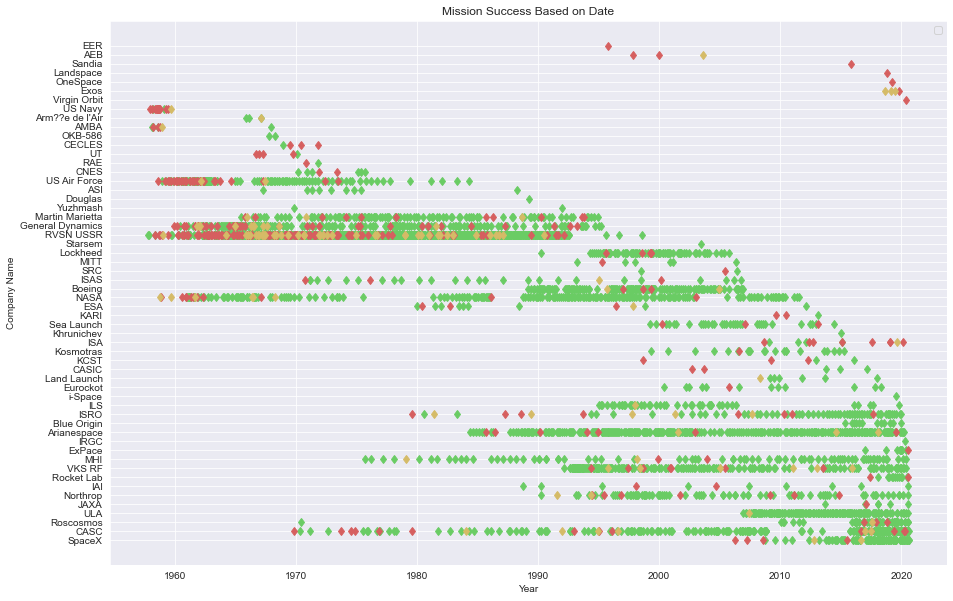

In [21]:
mask_status_s=Space_data['Status Mission']=='Success'
mask_status_f=Space_data['Status Mission']=='Failure'
mask_status_prf=Space_data['Status Mission']=='Prelaunch Failure'
mask_status_pf=Space_data['Status Mission']=='Partial Failure'

plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(Space_data['Date'][mask_status_s],Space_data['Company Name'][mask_status_s],'gd',Space_data['Date'][mask_status_f],Space_data['Company Name'][mask_status_f],'rd',Space_data['Date'][mask_status_prf|mask_status_pf],Space_data['Company Name'][mask_status_prf|mask_status_pf],'yd')
plt.title("Mission Success Based on Date")
plt.xlabel("Year")
plt.ylabel("Company Name")
plt.legend(loc="best");

With this plot we can conclude that the failed missions are more important at the beggining of the Space Race (the earliest dates of the history of space missions), than at the beggining of the individual companies.

There are more mutual information and more experience as time advances and the different companies take proffit of it. This is a general tendence and it's not true for every company, as we can see for ISA.

https://en.wikipedia.org/wiki/Iranian_Space_Agency


In [22]:

mask_status_ISA=Space_data['Company Name']=='ISA'
Space_data[mask_status_ISA]


,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Date,Year,Rocket
52,52,52,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Sun Feb 09, 2020 15:48 UTC",Simorgh | Zafar 1,1,NaN,Failure,Iran,2020-02-09,2020,0.0
106,106,106,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Thu Aug 29, 2019",Safir-1B+ | Nahid-1,1,NaN,Prelaunch Failure,Iran,2019-08-29,2019,0.0
163,163,163,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Tue Feb 05, 2019",Safir-1B+ | Dousti,1,NaN,Failure,Iran,2019-02-05,2019,0.0
169,169,169,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Tue Jan 15, 2019 00:30 UTC",Simorgh | Payam-e Amirkabir,1,NaN,Failure,Iran,2019-01-15,2019,0.0
335,335,335,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Thu Jul 27, 2017",Simorgh | Test Flight,1,NaN,Failure,Iran,2017-07-27,2017,0.0
515,515,515,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Tue Feb 17, 2015",Safir-1B+ | Unknown Payload,1,NaN,Failure,Iran,2015-02-17,2015,0.0
518,518,518,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Mon Feb 02, 2015",Safir-1B+ | Fajr,1,NaN,Success,Iran,2015-02-02,2015,0.0
632,632,632,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Sat Sep 22, 2012",Safir-1B+ | Unknown Payload,1,NaN,Failure,Iran,2012-09-22,2012,0.0
646,646,646,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Wed May 23, 2012",Safir-1B+ | Unknown Payload,1,NaN,Failure,Iran,2012-05-23,2012,0.0
658,658,658,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Fri Feb 03, 2012",Safir-1B | Navid,0,NaN,Success,Iran,2012-02-03,2012,0.0


I create a DataFrame with the successful missions

In [23]:
mask_success = Space_data['Status Mission']=='Success'
Space_data_success = Space_data.loc[mask_success]
mask_first = (Space_data_success['Date']).groupby([Space_data_success['Company Name']]).idxmin()
Space_data_first = Space_data_success.loc[mask_first]


I check if it is what I wanted with one example.

In [24]:
Space_data[Space_data['Company Name']=='ExPace']

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Date,Year,Rocket
11,11,11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",1,28.3,Failure,China,2020-07-10,2020,28.3
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,1,NaN,Success,China,2020-05-12,2020,0.0
59,59,59,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Thu Jan 16, 2020 03:02 UTC",Kuaizhou 1A | Yinhe-1,1,NaN,Success,China,2020-01-16,2020,0.0
74,74,74,ExPace,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Sat Dec 07, 2019 08:52 UTC",Kuaizhou 1A | HEAD-2A/B / SpaceTY 16/17 / Tian...,1,NaN,Success,China,2019-12-07,2019,0.0
75,75,75,ExPace,"Taiyuan Satellite Launch Center, China","Sat Dec 07, 2019 02:55 UTC",Kuaizhou 1A | Jilin-1 Gaofen-02B,1,NaN,Success,China,2019-12-07,2019,0.0
84,84,84,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Sun Nov 17, 2019 10:00 UTC","Kuaizhou 1A | KL-Alpha A, KL-Alpha B",1,NaN,Success,China,2019-11-17,2019,0.0
86,86,86,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Wed Nov 13, 2019 03:40 UTC",Kuaizhou 1A | Jilin 1-02A,1,NaN,Success,China,2019-11-13,2019,0.0
104,104,104,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Aug 30, 2019 23:41 UTC",Kuaizhou 1A | KX-09 & Others,1,NaN,Success,China,2019-08-30,2019,0.0
211,211,211,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Sat Sep 29, 2018 04:13 UTC",Kuaizhou 1A | CentiSpace-1 S1,1,NaN,Success,China,2018-09-29,2018,0.0
379,379,379,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Mon Jan 09, 2017 04:11 UTC","Kuaizhou 1A | Jilin-1 03, Caton-1 & Xingyun Sh...",1,NaN,Success,China,2017-01-09,2017,0.0


In [25]:
Space_data_first[Space_data['Company Name']=='ExPace']

<ipython-input-25-ef0ba63aa441>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Space_data_first[Space_data['Company Name']=='ExPace']


,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Date,Year,Rocket
379,379,379,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Mon Jan 09, 2017 04:11 UTC","Kuaizhou 1A | Jilin-1 03, Caton-1 & Xingyun Sh...",1,NaN,Success,China,2017-01-09,2017,0.0


Having the first successfull mission of each Company, I'm going to look for the previous missions of each Company.

In [26]:
#mask_not_success = Space_data['Status Mission']!='Success'
#Space_data_not_success = Space_data.loc[mask_not_success]
#Space_data_not_success.head()


When I can't manage with pandas... I make a loop.

In [27]:
#Space_data_first.head()

In [28]:
prev=[]

for i in range(0,Space_data.shape[0]):
    Company_ns=Space_data['Company Name'].iloc[i]
    Date_ns=Space_data['Date'].iloc[i]
    Status_ns=Space_data['Status Mission'].iloc[i]

    if Status_ns!='Success':
        one_first=0
        for j in range(0,Space_data_first.shape[0]):
            Company_fs=Space_data_first['Company Name'].iloc[j]
            Status_fs=Space_data_first['Status Mission'].iloc[j]
            Date_fs=Space_data_first['Date'].iloc[j]
            if Company_ns==Company_fs:
                one_first+=1
                if Date_ns<Date_fs:
                    prev.append(i)
                break    
        if one_first==0:
            # it means that this company hasn't no Successful Mission
            prev.append(i)

fail_columns = ['Company Name','Detail','Date','Year','Status Mission']
Space_data_fail_prev=Space_data.loc[prev,fail_columns]#.sort_values('Year').sort_values('Company Name')
Space_data_fail_prev.head()

,Company Name,Detail,Date,Year,Status Mission
27,Virgin Orbit,LauncherOne | Demo Flight,2020-05-25,2020,Failure
91,Exos,SARGE | Launch 4,2019-10-26,2019,Failure
127,Exos,SARGE | Launch 3,2019-06-29,2019,Partial Failure
152,OneSpace,OS-M1 | Lingque-1B,2019-03-27,2019,Failure
157,Exos,SARGE | Launch 2,2019-03-02,2019,Partial Failure


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

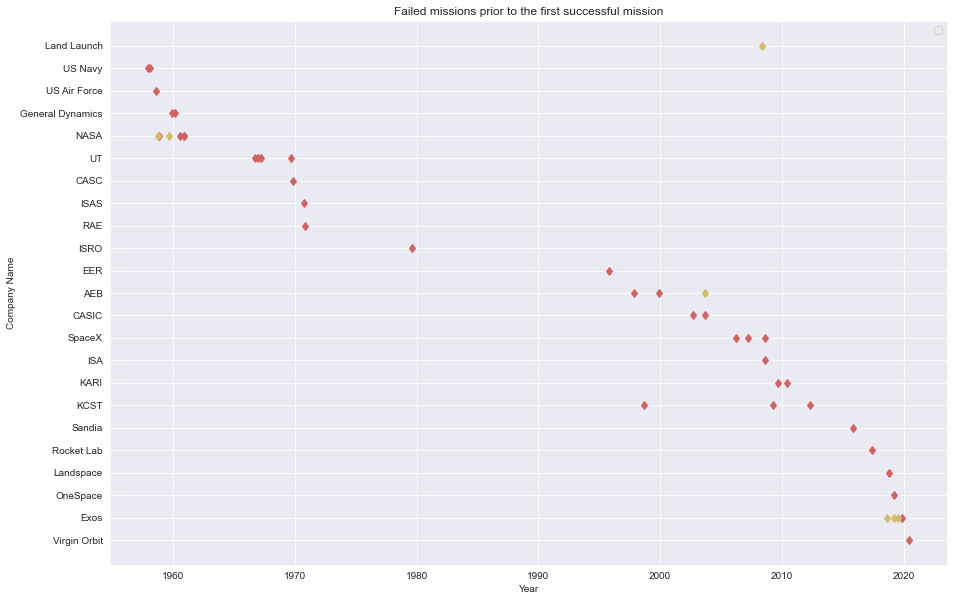

In [30]:
#mask_status_s=Space_data['Status Mission']=='Success'
#mask_status_f=Space_data['Status Mission']=='Failure'
#mask_status_prf=Space_data['Status Mission']=='Prelaunch Failure'
#mask_status_pf=Space_data['Status Mission']=='Partial Failure'

plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(Space_data_fail_prev['Date'][mask_status_s],Space_data_fail_prev['Company Name'][mask_status_s],'gd',Space_data_fail_prev['Date'][mask_status_f],Space_data_fail_prev['Company Name'][mask_status_f],'rd',Space_data_fail_prev['Date'][mask_status_prf|mask_status_pf],Space_data_fail_prev['Company Name'][mask_status_prf|mask_status_pf],'yd')
plt.title("Failed missions prior to the first successful mission")
plt.xlabel("Year")
plt.ylabel("Company Name")
plt.legend(loc="best");